In [6]:
#
# mathematische Pendel
#
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
#
g = 9.81
l = 1
#
# returns a time set for numerical integration
# t_span :  tuple with start and end value
# t : numpy ndarray with values for time
# T : periodicity
def time_set(omega):
    T = 2*np.pi/omega
    t_end=5*T
    t_start=0
    delta = T/100
    
    t_span = (t_start, t_end)
    t = np.arange(t_start, t_end, delta)
    return [t_span, t, T]
#


time_set(2)




[(0, 15.707963267948966),
 array([ 0.        ,  0.03141593,  0.06283185,  0.09424778,  0.12566371,
         0.15707963,  0.18849556,  0.21991149,  0.25132741,  0.28274334,
         0.31415927,  0.34557519,  0.37699112,  0.40840704,  0.43982297,
         0.4712389 ,  0.50265482,  0.53407075,  0.56548668,  0.5969026 ,
         0.62831853,  0.65973446,  0.69115038,  0.72256631,  0.75398224,
         0.78539816,  0.81681409,  0.84823002,  0.87964594,  0.91106187,
         0.9424778 ,  0.97389372,  1.00530965,  1.03672558,  1.0681415 ,
         1.09955743,  1.13097336,  1.16238928,  1.19380521,  1.22522113,
         1.25663706,  1.28805299,  1.31946891,  1.35088484,  1.38230077,
         1.41371669,  1.44513262,  1.47654855,  1.50796447,  1.5393804 ,
         1.57079633,  1.60221225,  1.63362818,  1.66504411,  1.69646003,
         1.72787596,  1.75929189,  1.79070781,  1.82212374,  1.85353967,
         1.88495559,  1.91637152,  1.94778745,  1.97920337,  2.0106193 ,
         2.04203522,  2.0

In [7]:
# returns the rhs for the penduulum as 1st order system
def pendel(t, state):
    [x,v] = state
    dx = v
    dv= - g/l*np.sin(x)
    return [dx, dv]
#
pendel(1, [2,3])

[3, -8.920207757159938]

In [8]:
# returns the rhs for the linearized penduulum as 1st order system
def pendel_lin(t, state):
    [x,v] = state
    dx = v
    dv= - g/l*x)
    return [dx, dv]
#

In [38]:
[t_span, t, T] = time_set(np.sqrt(g/l)) # get timeset
[x0,v0] = [0,1] # initial values
#[x0,v0] = [4,0] # qualitative difference
#[x0,v0] = [2,0] # quantative difference
#[x0,v0] = [0.1,0] # good match

#

results_ivp_pendel = solve_ivp(pendel, t_span, [x0,v0], method='RK45',t_eval=t, max_step=0.01) # numerical integration of penduulum
results_ivp_pendel.y
x_p = results_ivp_pendel.y[0]
v_p = results_ivp_pendel.y[1]

results_ivp_lin = solve_ivp(pendel_lin, t_span, [x0,v0], method='RK45',t_eval=t, max_step=0.01) # numerical integration of linearized penduulum
x_lin = results_ivp_lin.y[0] # displacement
v_lin = results_ivp_lin.y[1] # velocity
#

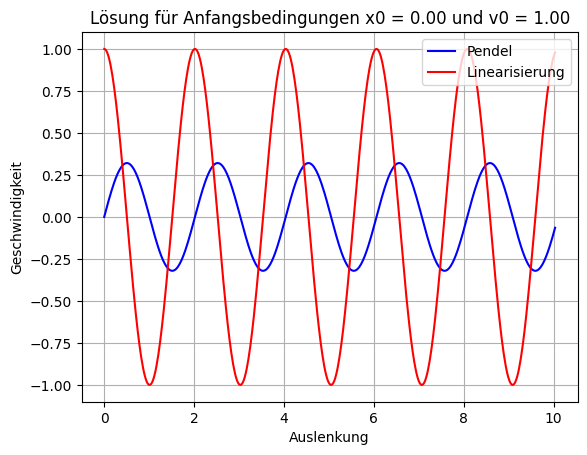

In [39]:
# plot results
fig = plt.figure()
#
ax = fig.add_subplot(1, 1, 1)
plt.grid(True)
ax.plot(t,x_p,color='blue')
ax.plot(t,v_p,color='red')
ax.set_xlabel("Auslenkung")
ax.set_ylabel("Geschwindigkeit")
ax.legend(['Pendel','Linearisierung'],loc='upper right')
ax.set_title(f'Lösung für Anfangsbedingungen x0 = {x0:.2f} und v0 = {v0:.2f}')

#
plt.show()
#